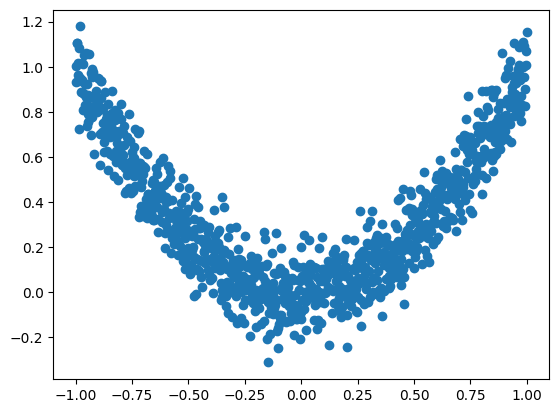

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


In [26]:
"""
View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
torch: 0.4
matplotlib
"""
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

# put dateset into torch dataset
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)


# default network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        # x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = F.softplus(self.hidden(x)) 
        x = self.predict(x)             # linear output
        # x = F.softmax(x)
        return x

if __name__ == '__main__':
    # different nets
    net_SGD         = Net()
    net_Momentum    = Net()
    net_RMSprop     = Net()
    net_Adam        = Net()
    nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

    # different optimizers
    opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
    opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
    opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
    opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
    optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

    loss_func = torch.nn.MSELoss()
    # loss_func = torch.nn.CrossEntropyLoss()
    losses_his = [[], [], [], []]   # record loss

    plot_dynamics = []

    # training
    for epoch in range(EPOCH):
        print('Epoch: ', epoch)
        for step, (b_x, b_y) in enumerate(loader):          # for each training step
            # for net, opt, l_his in zip(nets, optimizers, losses_his):
            net = net_Adam
            opt = opt_Adam

            output = net(b_x)              # get output for every net
            loss = loss_func(output, b_y)  # compute loss for every net
            opt.zero_grad()                # clear gradients for next train
            loss.backward()                # backpropagation, compute gradients
            opt.step()                     # apply gradients
            # l_his.append(loss.data.numpy())     # loss recoder
            plot_dynamics.append(net(torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)).detach().numpy())
            

    # labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
    # for i, l_his in enumerate(losses_his):
    #     plt.plot(l_his, label=labels[i])
    # plt.legend(loc='best')
    # plt.xlabel('Steps')
    # plt.ylabel('Loss')
    # plt.ylim((0, 0.2))
    # plt.show()

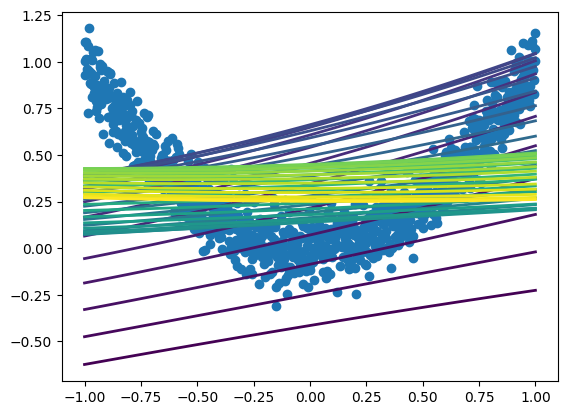

In [27]:
plt.scatter(x.numpy(), y.numpy())

pld = plot_dynamics[:50]

import matplotlib.pyplot as plt
import numpy as np

colors = np.linspace(0, 1, len(pld))  # Generating a range of colors

i = 0
for it, color in zip(pld, colors):
    plt.plot(np.linspace(-1, 1, 100), it, color=plt.cm.viridis(color), lw=2)  # Using viridis colormap
    i = i + 1

plt.show()


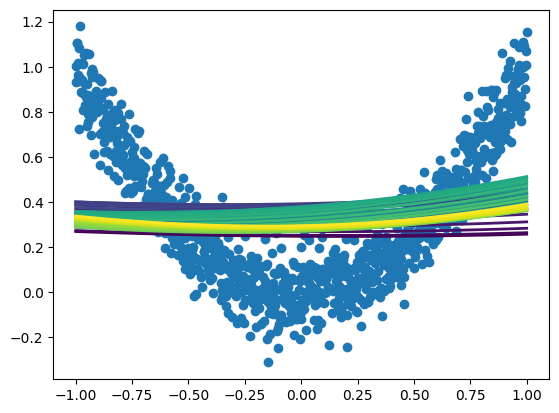

In [28]:
plt.scatter(x.numpy(), y.numpy())

pld = plot_dynamics[50:100]

import matplotlib.pyplot as plt
import numpy as np

colors = np.linspace(0, 1, len(pld))  # Generating a range of colors

i = 0
for it, color in zip(pld, colors):
    plt.plot(np.linspace(-1, 1, 100), it, color=plt.cm.viridis(color), lw=2)  # Using viridis colormap
    i = i + 1

plt.show()


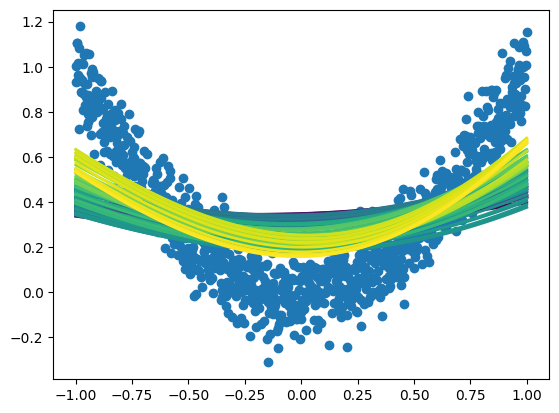

In [29]:
plt.scatter(x.numpy(), y.numpy())

pld = plot_dynamics[100:200]

import matplotlib.pyplot as plt
import numpy as np

colors = np.linspace(0, 1, len(pld))  # Generating a range of colors

i = 0
for it, color in zip(pld, colors):
    plt.plot(np.linspace(-1, 1, 100), it, color=plt.cm.viridis(color), lw=2)  # Using viridis colormap
    i = i + 1

plt.show()


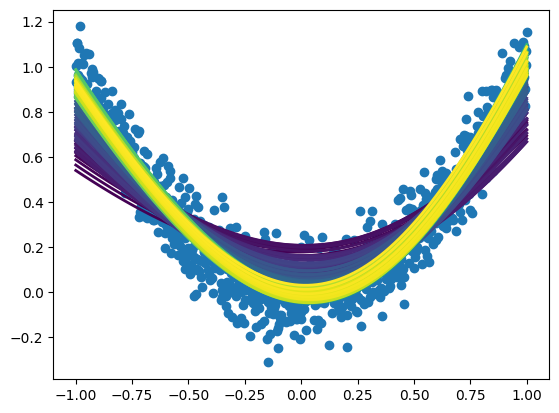

In [30]:
plt.scatter(x.numpy(), y.numpy())

pld = plot_dynamics[200:]

import matplotlib.pyplot as plt
import numpy as np

colors = np.linspace(0, 1, len(pld))  # Generating a range of colors

i = 0
for it, color in zip(pld, colors):
    plt.plot(np.linspace(-1, 1, 100), it, color=plt.cm.viridis(color), lw=2)  # Using viridis colormap
    i = i + 1

plt.show()


In [31]:
plot_dynamics

[array([[-0.6237202 ],
        [-0.61934274],
        [-0.61497027],
        [-0.6106029 ],
        [-0.6062409 ],
        [-0.6018841 ],
        [-0.5975328 ],
        [-0.593187  ],
        [-0.5888467 ],
        [-0.58451205],
        [-0.5801832 ],
        [-0.5758602 ],
        [-0.57154304],
        [-0.5672319 ],
        [-0.5629268 ],
        [-0.5586279 ],
        [-0.55433524],
        [-0.5500489 ],
        [-0.5457691 ],
        [-0.5414956 ],
        [-0.5372288 ],
        [-0.53296864],
        [-0.5287152 ],
        [-0.52446866],
        [-0.5202289 ],
        [-0.5159963 ],
        [-0.51177067],
        [-0.5075522 ],
        [-0.50334096],
        [-0.49913698],
        [-0.49494043],
        [-0.49075136],
        [-0.48656976],
        [-0.48239577],
        [-0.4782295 ],
        [-0.47407094],
        [-0.4699202 ],
        [-0.46577737],
        [-0.4616424 ],
        [-0.45751554],
        [-0.45339674],
        [-0.44928604],
        [-0.44518358],
        [-0

In [32]:
# net_Adam(torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1))

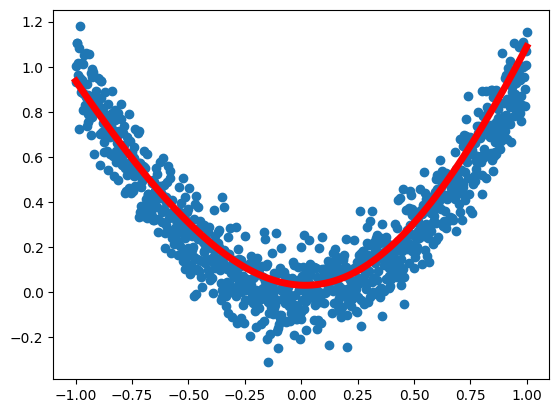

In [33]:
plt.scatter(x.numpy(), y.numpy())
plt.plot(torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).detach().numpy(), net_Adam(torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)).detach().numpy(), 'r-', lw=5)
